In [2]:
# data_dir = "/scr/shared/clam/datasets/metaworld/assembly-v2/buffer_assembly-v2.pt"
data_dir = "/scr2/shared/pref/datasets/robomimic/lift/mg_image_dense.pt"

import numpy as np

# load with tensordict
import torch

data = torch.load(data_dir, weights_only=False)

print(data)

episode_data = data["episode"].cpu().numpy()
episode_ind = np.where(episode_data[:-1] != episode_data[1:])[0]
print(episode_ind)

TensorDict(
    fields={
        action: Tensor(shape=torch.Size([225000, 7]), device=cpu, dtype=torch.float32, is_shared=False),
        episode: Tensor(shape=torch.Size([225000]), device=cpu, dtype=torch.int64, is_shared=False),
        image: Tensor(shape=torch.Size([225000, 84, 84, 3]), device=cpu, dtype=torch.uint8, is_shared=False),
        obs: Tensor(shape=torch.Size([225000, 19]), device=cpu, dtype=torch.float32, is_shared=False),
        reward: Tensor(shape=torch.Size([225000]), device=cpu, dtype=torch.float32, is_shared=False)},
    batch_size=torch.Size([]),
    device=None,
    is_shared=False)
[   149    299    449 ... 224549 224699 224849]


IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (84, 84) to (96, 96) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).


[0.00730619 0.00754699 0.00770946 ... 1.         1.         1.        ]
0 149
[0.00754699 0.00770946 0.00709865 0.00643722 0.00621286 0.00628871
 0.0070876  0.00786767 0.0082583  0.0083888  0.00766053 0.00523873
 0.00385869 0.00280171 0.00245042 0.00214808 0.00170249 0.00163974
 0.00180992 0.00152469 0.00124922 0.00147992 0.00150547 0.00144904
 0.00128271 0.00088437 0.00078776 0.00088196 0.00107513 0.00106786
 0.00104625 0.00144583 0.00196665 0.00222809 0.00216495 0.00163334
 0.00140604 0.0011306  0.00093896 0.00081319 0.00071729 0.00074329
 0.00080875 0.00082793 0.0006931  0.00060273 0.00058219 0.00059932
 0.00064252 0.00054806 0.00053335 0.00060531 0.00064171 0.00052604
 0.00037274 0.00031473 0.00035072 0.0003708  0.00033452 0.00035724
 0.00038402 0.00035583 0.00036018 0.00040834 0.00041495 0.00045915
 0.00047295 0.000483   0.00051839 0.00053857 0.00058943 0.00063772
 0.00063124 0.00057623 0.000616   0.00065964 0.00064285 0.00057778
 0.00050076 0.00046276 0.00045925 0.00044355 0.0005

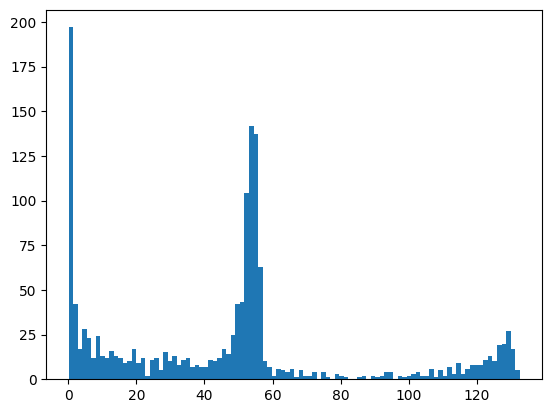

In [3]:
episode_data = data["episode"].cpu().numpy()
episode_ind = np.where(episode_data[:-1] != episode_data[1:])[0]
# print(episode_ind)

obs = data["image"].cpu().numpy()
first_ep = obs[: episode_ind[0]]

# make video and render as imageio
import imageio

imageio.mimsave("test.mp4", first_ep, fps=30)

trajs_rews = data["reward"].cpu().numpy()
print(trajs_rews)
trajs_rets = []
start = 0
for i in range(len(episode_ind)):
    print(start, episode_ind[i])
    if i == 0:
        ret = trajs_rews[start + 1 : episode_ind[i]]
    else:
        ret = trajs_rews[start + 2 : episode_ind[i]]
    print(ret)
    trajs_rets.append(ret)
    start = episode_ind[i]

# print(len(trajs_rets))
trajs_rets = np.array(trajs_rets)
trajs_rets = np.sum(trajs_rets, axis=1)


# make histogram of trajs_rets
import matplotlib.pyplot as plt

plt.hist(trajs_rets, bins=100)
plt.show()

In [4]:
trajs_rews = data["reward"].cpu().numpy()
trajs_rews[:200]

array([0.00730619, 0.00754699, 0.00770946, 0.00709865, 0.00643722,
       0.00621286, 0.00628871, 0.0070876 , 0.00786767, 0.0082583 ,
       0.0083888 , 0.00766053, 0.00523873, 0.00385869, 0.00280171,
       0.00245042, 0.00214808, 0.00170249, 0.00163974, 0.00180992,
       0.00152469, 0.00124922, 0.00147992, 0.00150547, 0.00144904,
       0.00128271, 0.00088437, 0.00078776, 0.00088196, 0.00107513,
       0.00106786, 0.00104625, 0.00144583, 0.00196665, 0.00222809,
       0.00216495, 0.00163334, 0.00140604, 0.0011306 , 0.00093896,
       0.00081319, 0.00071729, 0.00074329, 0.00080875, 0.00082793,
       0.0006931 , 0.00060273, 0.00058219, 0.00059932, 0.00064252,
       0.00054806, 0.00053335, 0.00060531, 0.00064171, 0.00052604,
       0.00037274, 0.00031473, 0.00035072, 0.0003708 , 0.00033452,
       0.00035724, 0.00038402, 0.00035583, 0.00036018, 0.00040834,
       0.00041495, 0.00045915, 0.00047295, 0.000483  , 0.00051839,
       0.00053857, 0.00058943, 0.00063772, 0.00063124, 0.00057

In [3]:
from train_iql_policy import get_robomimic_env

env = get_robomimic_env(data_path=data_dir, render=False, render_offscreen=False, use_image_obs=False)

[robosuite WARNING] No private macro file found! (macros.py:57)
[robosuite WARNING] It is recommended to use a private macro file (macros.py:58)
[robosuite WARNING] To setup, run: python /scr/matthewh6/miniconda3/envs/pref/lib/python3.9/site-packages/robosuite/scripts/setup_macros.py (macros.py:59)
[robosuite WARNING] Could not import robosuite_models. Some robots may not be available. If you want to use these robots, please install robosuite_models from source (https://github.com/ARISE-Initiative/robosuite_models) or through pip install. (__init__.py:30)
[robosuite WARNING] Could not load the mink-based whole-body IK. Make sure you install related import properly, otherwise you will not be able to use the default IK controller setting for GR1 robot. (__init__.py:40)


Created environment with name Lift
Action size is 7


/scr/matthewh6/miniconda3/envs/pref/lib/python3.9/site-packages/gym/spaces/box.py:127: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")


In [4]:
from utils.eval_utils import RenderWrapper

env = RenderWrapper(env)


In [8]:
# get info
env.step(np.zeros(env.action_space.shape))


({'state': array([-0.09567404, -0.00702178,  1.0133275 ,  0.99786376,  0.00313235,
          0.06522488,  0.00195703,  0.02080373, -0.02080406,  0.00148539,
         -0.0040833 ,  0.81992088,  0.        ,  0.        ,  0.79251583,
          0.60985134,  0.09715942,  0.00293848, -0.19340661])},
 0.011561613942401145,
 False,
 {})